In [72]:
import nltk
nltk.download('popular')
import demoji
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist
import spacy
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package movie_review

In [73]:
# Read the text file
with open('input.txt', 'r') as file:
    text = file.read()


In [74]:
def remove_punctuation(text):
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    # Use translate method to remove punctuation
    cleaned_text = text.translate(translator)
    return cleaned_text

def remove_stop_words(text):
    nltk.download("stopwords")
    nltk_stopwords = stopwords.words('english')

    nlp = spacy.load("en_core_web_sm")
    spacy_stopwords = nlp.Defaults.stop_words

    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in spacy_stopwords and token not in nltk_stopwords]
    return " ".join(tokens)

def remove_emoji_and_smart_quotes(text):
    # replacing emojis with description
    text = demoji.replace_with_desc(text)
    #Removing smart quotes
    return text.replace(""", "\"").replace(""","\"")

def clean_text(text):
    text = remove_punctuation(text)
    text = remove_emoji_and_smart_quotes(text)
    return remove_stop_words(text)

## 1. Remove punctuation and stop words in the data files. (10 points)

In [75]:
text = clean_text(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shireesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
text


'University Pacific Pacific UOP private university originally founded Methodistaffiliated university main campus Stockton California graduate campuses San Francisco Sacramento It university state California4 independent coeducational campus California conservatory music medical school West Coast Pacific chartered July 10 1851 Santa Clara California California Wesleyan College The school moved San Jose 1871 Stockton 1923 Pacific accredited WASC Senior College University Commission5 In addition liberal arts college graduate school Pacific schools business dentistry education engineering international studies law music pharmacy health sciences It home papers environmental pioneer John Muir Pacifics HoltAtherton Special Collections Archives67 The university John Muir Center hosts Muir Symposium encourage use John Muirs Papers At Pacifics William Knox Holt Memorial Library museum style presentational space Muirs Papers The Muir Experience display physical digital exhibits inspire user inter

## 2. Print out the 20 most common words in the frequency distribution.  (10 points)

In [77]:
def get_most_frequent_words(text, count=20):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Calculate word frequencies
    freq_dist = FreqDist(tokens)
    # Get the 10 most frequent words
    return freq_dist.most_common(10)


In [78]:
get_most_frequent_words(text)

[('Pacific', 42),
 ('The', 36),
 ('In', 25),
 ('chapter', 23),
 ('University', 22),
 ('College', 21),
 ('campus', 20),
 ('School', 20),
 ('university', 19),
 ('Stockton', 17)]

## 3. Plot the frequency distribution in three different ways and explain which one is most effective.  (40 points)

In [79]:
import matplotlib.pyplot as plt
def plot_bar_chart_frequency(most_common_words, prefix="3-"):
    # Extract words and their frequencies
    words, frequencies = zip(*most_common_words)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title('Top 20 Most Frequent Words')
    plt.xticks(rotation=45, fontsize=12)

    # Save the chart as an image file
    plt.savefig(prefix+'week_6_bar_frequencies.png', bbox_inches='tight')

    # Show the chart (optional)
    plt.show()


def plot_line_chart_frequency(most_common_words, prefix="3-"):
    # Extract words and their frequencies
    words, frequencies = zip(*most_common_words)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.plot(words, frequencies, marker='o', linestyle='-')
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title('Top 20 Most Frequent Words')
    plt.xticks(rotation=45, fontsize=12)

    # Save the chart as an image file
    plt.savefig(prefix+'week_6_line_frequencies.png', bbox_inches='tight')

    # Show the chart (optional)
    plt.show()
    
def plot_word_cloud_frequency(most_common_words,prefix="3-"):
    # Create a dictionary from the most common words
    wordcloud_dict = dict(most_common_words)
    # Generate a word cloud from the frequency distribution
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

    # Create a figure for the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')

    # Save the word cloud as an image file
    wordcloud.to_file(prefix+'week5_word_cloud.png')

    # Show the word cloud (optional)
    plt.show()

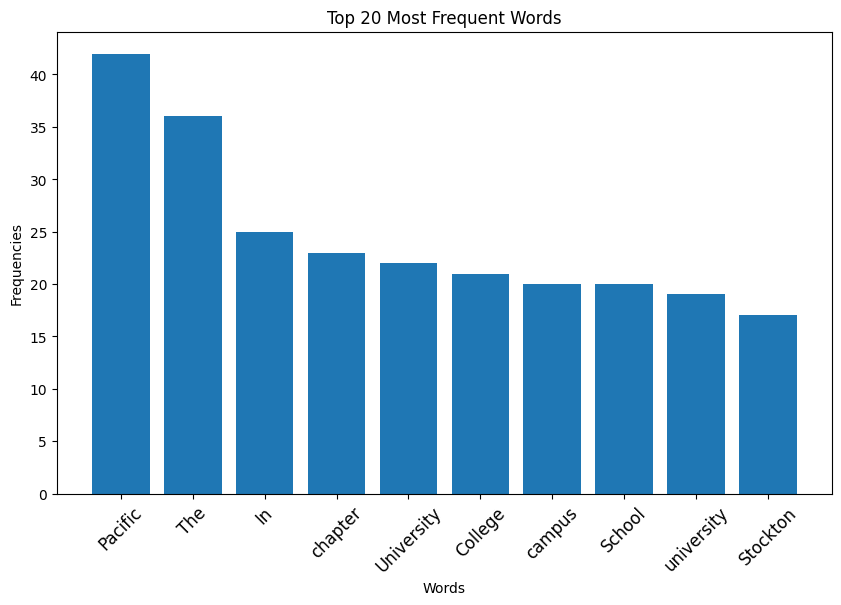

In [80]:
most_common_words = get_most_frequent_words(text)
plot_bar_chart_frequency(most_common_words)

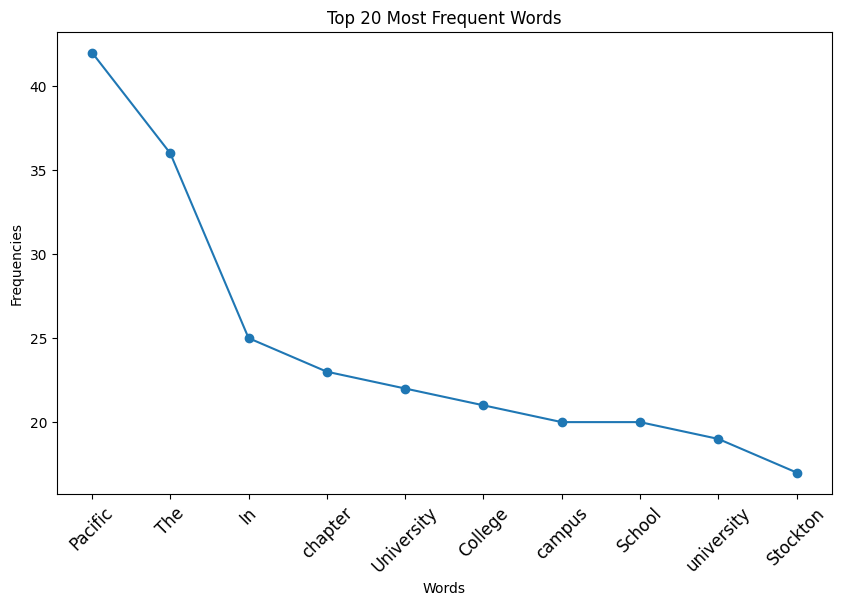

In [81]:
plot_line_chart_frequency(most_common_words)

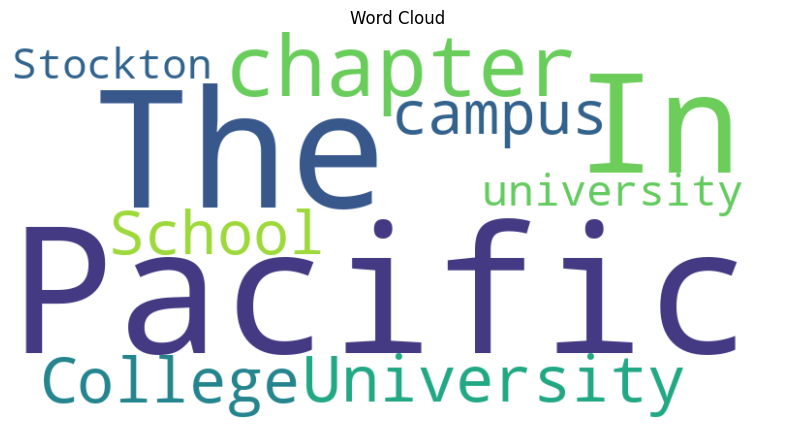

In [82]:
plot_word_cloud_frequency(most_common_words)

## 4. Count and display the most common 20 bigrams in your data.  (10 points)

In [83]:
def get_most_common_bigrams(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Generate bigrams
    bi_grams = list(bigrams(words))
    # Calculate the frequency distribution of bigrams
    bi_gram_freq = FreqDist(bi_grams)
    # Get the 20 most common bigrams
    most_common_bigrams = bi_gram_freq.most_common(20)
    return most_common_bigrams

In [84]:
get_most_common_bigrams(text)

[(('San', 'Francisco'), 11),
 (('University', 'Pacific'), 9),
 (('The', 'university'), 7),
 (('West', 'Coast'), 5),
 (('Stockton', 'Campus'), 5),
 (('mens', 'womens'), 5),
 (('Santa', 'Clara'), 4),
 (('graduate', 'professional'), 4),
 (('Sacramento', 'Campus'), 4),
 (('Francisco', 'Campus'), 4),
 (('Pacific', 'Tigers'), 4),
 (('medical', 'school'), 3),
 (('San', 'Jose'), 3),
 (('liberal', 'arts'), 3),
 (('health', 'sciences'), 3),
 (('Pacific', 'The'), 3),
 (('McGeorge', 'School'), 3),
 (('School', 'Law'), 3),
 (('universitys', 'board'), 3),
 (('university', 'opened'), 3)]

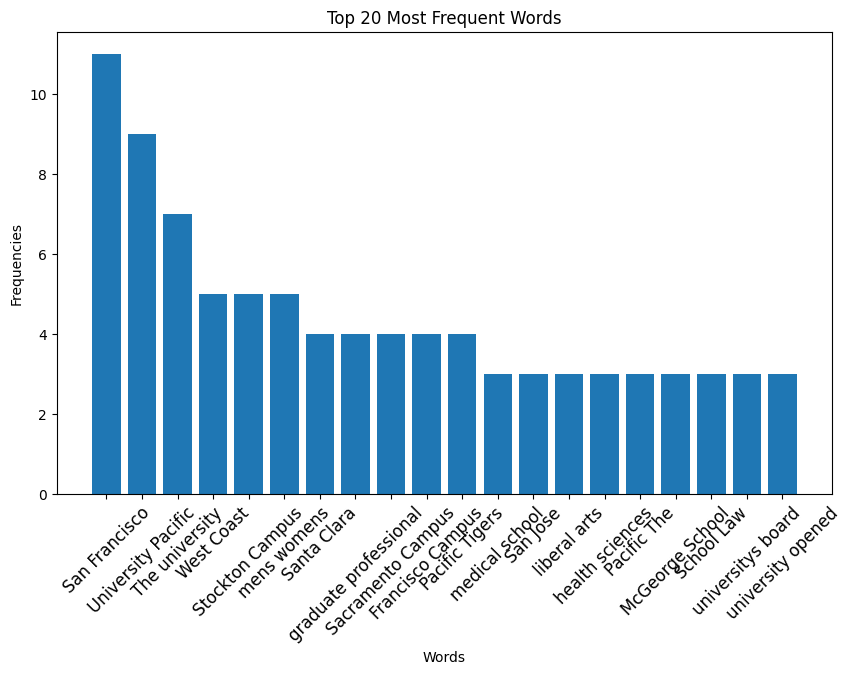

In [85]:
bigrams = [(i+' ' +j, q) for (i,j), q in get_most_common_bigrams(text)]
plot_bar_chart_frequency(bigrams, prefix="4-")

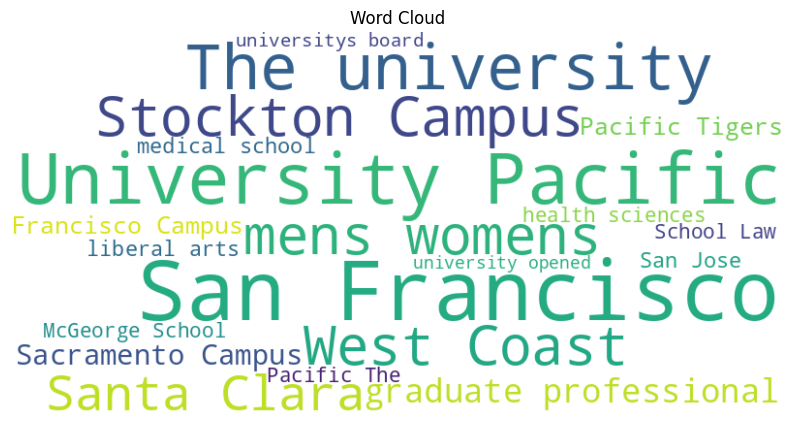

In [86]:
plot_word_cloud_frequency(bigrams, prefix="4-")

## 5. Propose and implement an effective way to measure the similarities among documents/records that exist in your data.  (30 points)

In [87]:
import os
import glob
def collect_data():
    text_file_pattern = "*.txt"  # You can adjust the pattern to match your file extensions
    text_files = glob.glob(os.path.join("../nhs/content", text_file_pattern))
    data = {}
    for file_path in text_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            file_name = os.path.basename(file_path)
            file_content = file.read()
            data[file_name] = file_content
    return data
            


In [88]:
corpus = collect_data()

In [89]:
all_text = ""
for data in corpus:
    all_text += " " + data
all_text = clean_text(all_text)
words = word_tokenize(all_text)
word_features = list(FreqDist(words).most_common(1000))
word_features = [i for i,j in word_features]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shireesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
def get_features(text):
    features = {}
    for word in word_features:
        features[word] = 1 if word in text else 0
    return features

In [91]:
dataframe_data = []
for key in corpus.keys():
    features = get_features(corpus[key])
    features['title'] = key
    dataframe_data.append(features)

dataframe_data = {idx: dataframe_data[idx] for idx in range(len(dataframe_data))}

In [92]:
import pandas as pd
df = pd.DataFrame.from_dict(data=dataframe_data, orient='index', columns=word_features)

In [93]:
df.columns

Index(['NHStxt', 'syndrome', 'disease', 'cancer', 'pain', 'disorder',
       'children', 'test', 'Broken', 'fever',
       ...
       'chronic', 'MECFS', 'Malignant', 'Anabolic', 'steroid', 'Pataus',
       'Vaccinations', 'Lipoedema', 'Q', 'cholesterol'],
      dtype='object', length=1000)

/Users/shireesh/opt/anaconda3/envs/COMP293/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



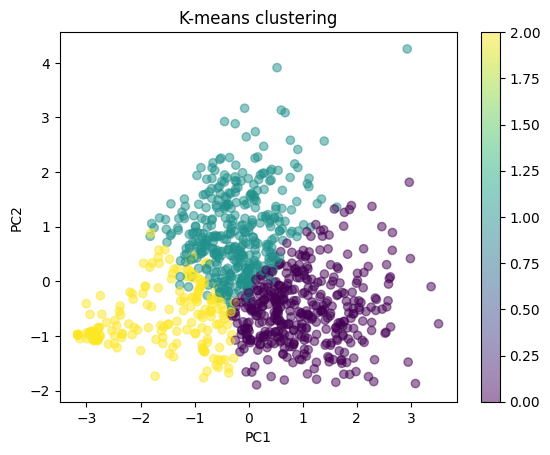

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42).fit(df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Use PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.values)
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2'])

# plot data
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering")
plt.colorbar()
plt.savefig("clustering_2d.png")
plt.show()

/Users/shireesh/opt/anaconda3/envs/COMP293/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



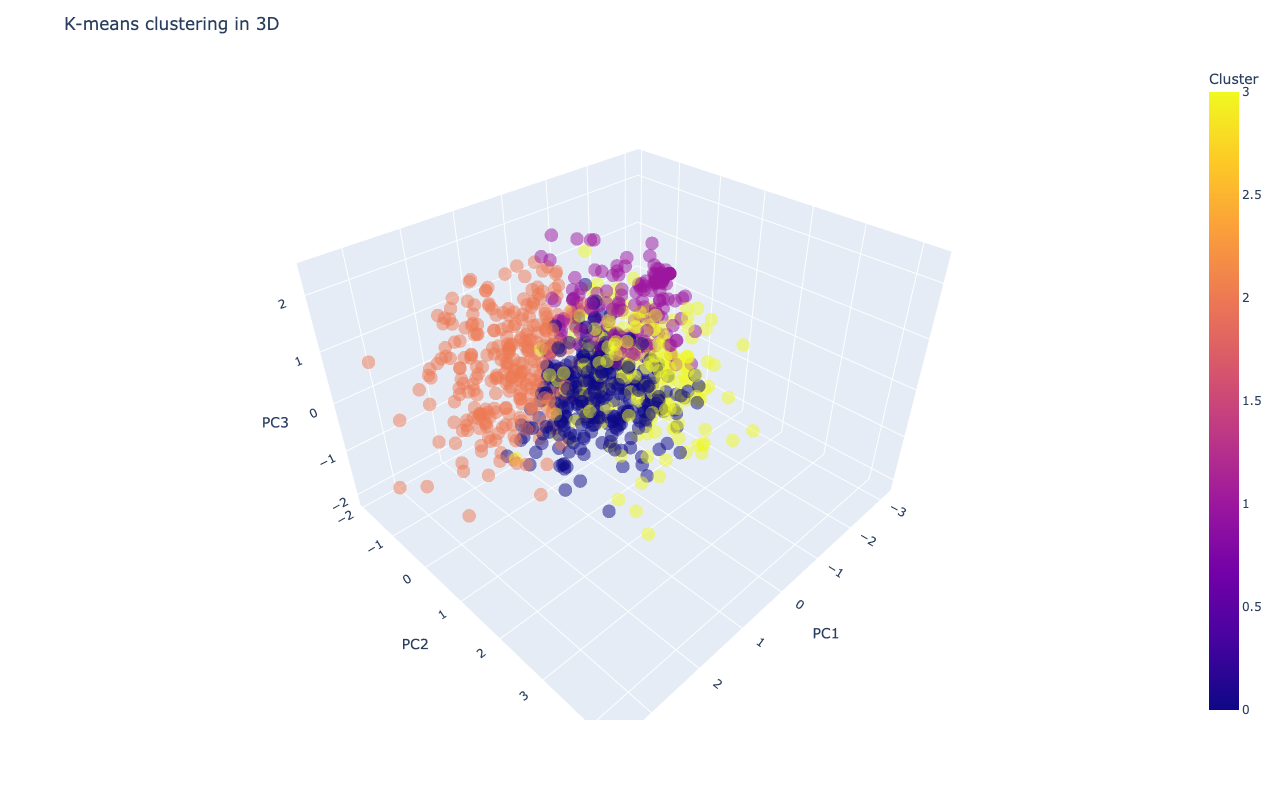

In [95]:
import plotly.express as px
# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=4, random_state=42).fit(df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Use PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df.values)
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

# Add cluster labels, gene names, and cell types to PCA dataframe
pca_df['Cluster'] = cluster_labels
pca_df['file name'] = corpus.keys()

# Create 3D scatter plot
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.5,width=1000, height=800, hover_data=['file name'])

# Set title and axis labels
fig.update_layout(title='K-means clustering in 3D', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))

# Show the plot
fig.show()